The Iris dataset consists of 150 samples of iris flowers from three different species: Setosa, Versicolor, and Virginica. Each sample includes four features: sepal length, sepal width, petal length, and petal width. It was introduced by the British biologist and statistician Ronald Fisher in 1936 as an example of discriminant analysis.

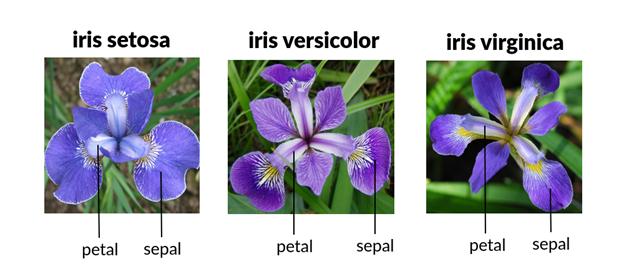

* Sepal Length: The length of the iris flower’s sepals (the green leaf-like * structures that encase the flower bud).
* Sepal Width: The width of the iris flower’s sepals.
* Petal Length: The length of the iris flower’s petals (the colored structures of the flower).
* Petal Width: The width of the iris flower’s petals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [44]:
df = df.drop('Id', axis=1)

In [45]:
df['Species'].value_counts()

,count
Species,
0,50
1,50
2,50


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Basic Descriptive Statistics

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of features and target

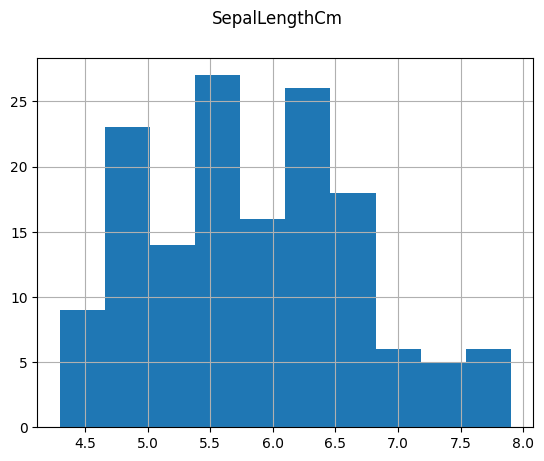

In [8]:
col = "SepalLengthCm"
df[col].hist()
plt.suptitle(col)
plt.show()

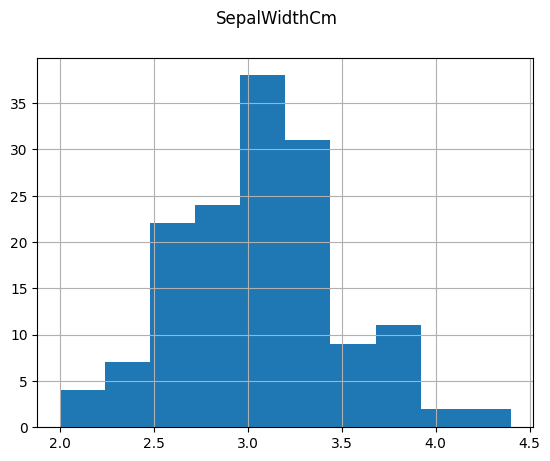

In [9]:
col = "SepalWidthCm"
df[col].hist()
plt.suptitle(col)
plt.show()

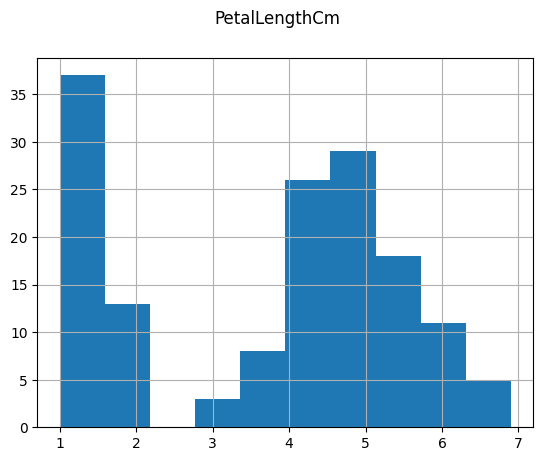

In [10]:
col = "PetalLengthCm"
df[col].hist()
plt.suptitle(col)
plt.show()

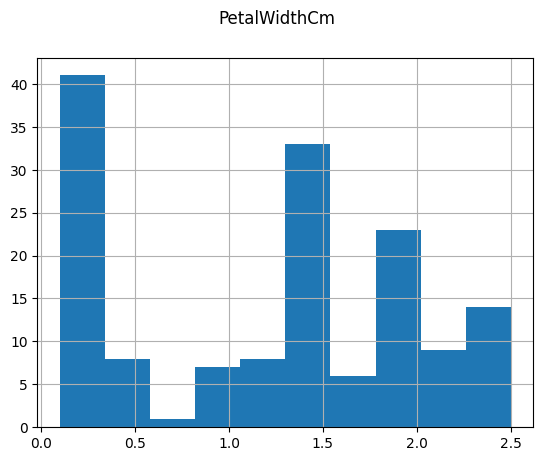

In [11]:
col = "PetalWidthCm"
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship of the data features with the target

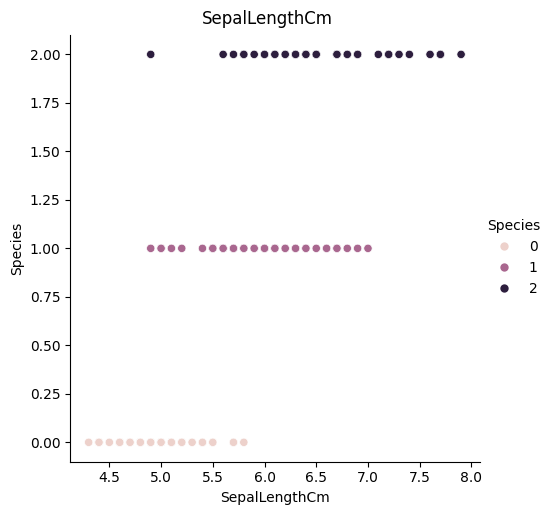

In [21]:
col = "SepalLengthCm"
sns.relplot(x=col,y='Species', hue='Species',data=df)
plt.suptitle(col,y=1.02)
plt.show()

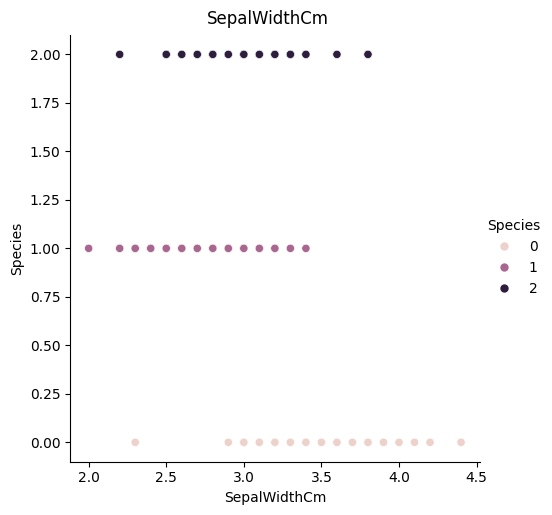

In [22]:
col = "SepalWidthCm"
sns.relplot(x=col,y='Species', hue='Species',data=df)
plt.suptitle(col,y=1.02)
plt.show()


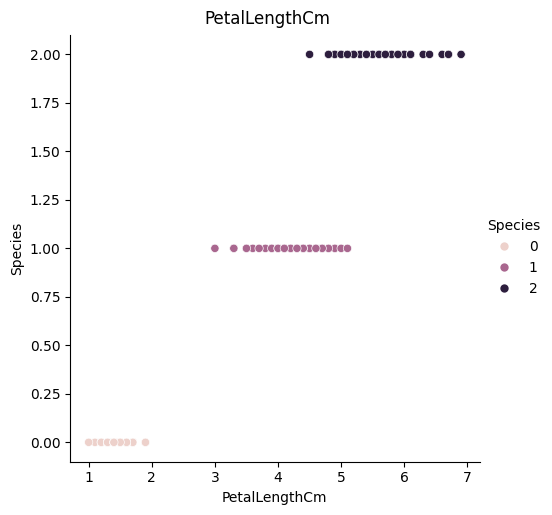

In [23]:
col = "PetalLengthCm"
sns.relplot(x=col,y='Species', hue='Species',data=df)
plt.suptitle(col,y=1.02)
plt.show()

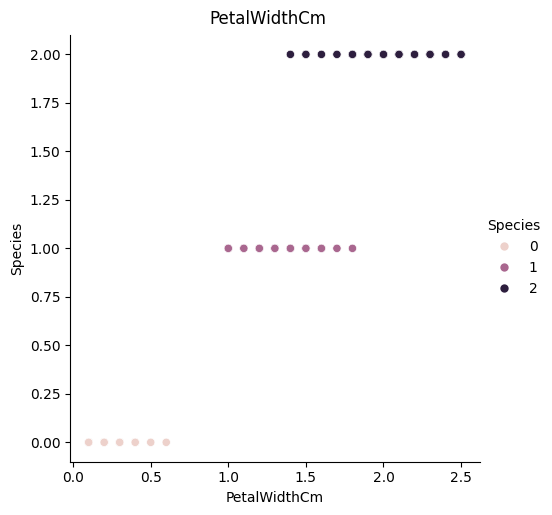

In [24]:
col = "PetalWidthCm"
sns.relplot(x=col,y='Species', hue='Species',data=df)
plt.suptitle(col,y=1.02)
plt.show()

# Pairplots

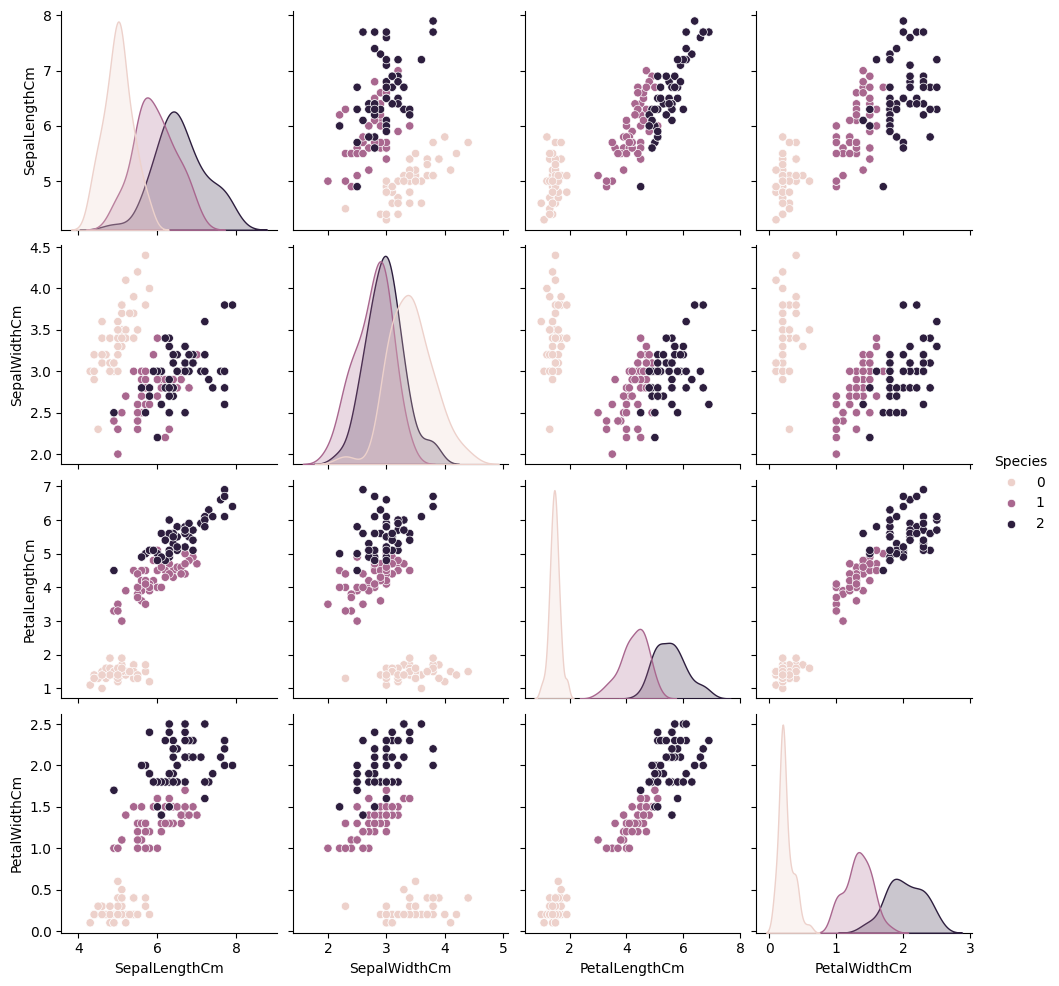

In [31]:
sns.pairplot(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']],hue='Species')

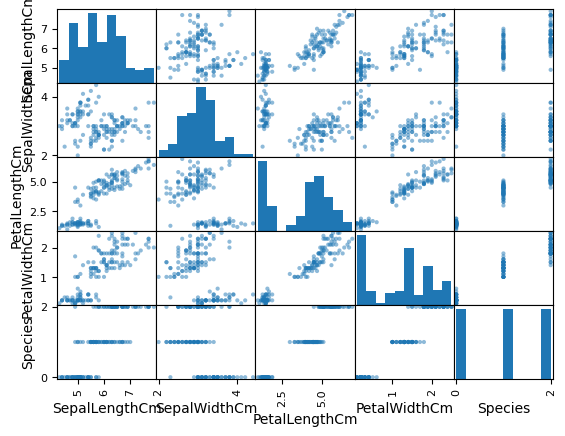

In [41]:
pd.plotting.scatter_matrix(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']])

plt.show()

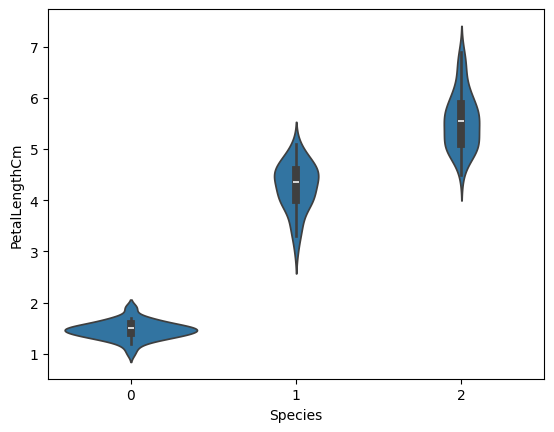

In [48]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df)
plt.show()

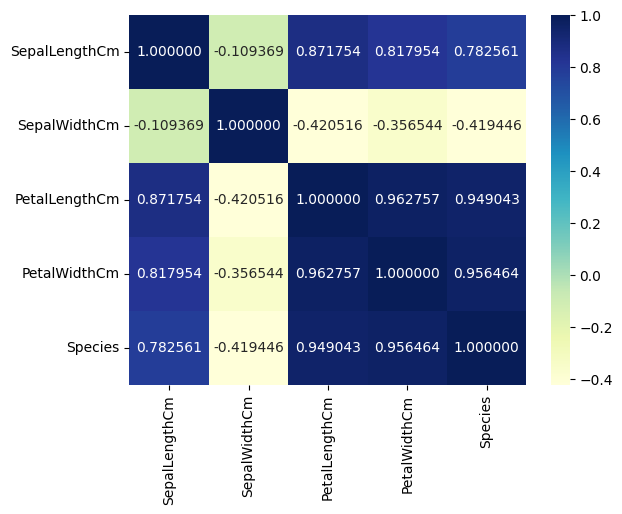

In [49]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt="f")
plt.show()

There is a high corelation between: Sepal Length & Petal Length, Sepal Length & Petal Width, and Petal Length & Petal Width.

# Train_test_split

In [50]:
X = df.drop(['Species'],axis=1)
y = df['Species']

In [51]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [59]:
X_train.shape

(120, 4)

In [60]:
X_test.shape

(30, 4)

In [61]:
y_train.shape

(120,)

# Model Training

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [69]:
svc= SVC(kernel= 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier ()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier (max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [70]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC':bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [83]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision for multiclass (you can choose 'macro', 'micro', or 'weighted')
    precision = precision_score(y_test, y_pred, average='macro')

    return accuracy, precision

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  SVC
Accuracy -  0.26666666666666666
Precision -  0.08888888888888889
For  KN
Accuracy -  1.0
Precision -  1.0
For  NB
Accuracy -  0.9666666666666667
Precision -  0.9629629629629629
For  DT
Accuracy -  0.9333333333333333
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9666666666666667
Precision -  0.9629629629629629
For  RF
Accuracy -  0.9666666666666667
Precision -  0.9629629629629629
For  AdaBoost
Accuracy -  0.9333333333333333
Precision -  0.9166666666666666
For  BgC
Accuracy -  0.9666666666666667
Precision -  0.9629629629629629
For  ETC
Accuracy -  0.9666666666666667
Precision -  0.9629629629629629
For  GBDT
Accuracy -  0.9333333333333333
Precision -  0.9166666666666666
For  xgb
Accuracy -  0.9666666666666667
Precision -  0.9629629629629629


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score

# Define cross-validation function for classifiers
def cross_val_train_classifier(clf, X, y, cv=5):
    # Define scoring metrics
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='macro')}

    # Perform cross-validation
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=False)

    return scores['test_accuracy'].mean(), scores['test_precision'].mean()

# Lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []

# Perform cross-validation for each classifier
for name, clf in clfs.items():
    current_accuracy, current_precision = cross_val_train_classifier(clf, X_train, y_train, cv=5)

    print("For ", name)
    print("Cross-validated Accuracy - ", current_accuracy)
    print("Cross-validated Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

For  SVC
Cross-validated Accuracy -  0.3333333333333333
Cross-validated Precision -  0.11111111111111112
For  KN
Cross-validated Accuracy -  0.95
Cross-validated Precision -  0.9546296296296296
For  NB
Cross-validated Accuracy -  0.9583333333333334
Cross-validated Precision -  0.967003367003367
For  DT
Cross-validated Accuracy -  0.975
Cross-validated Precision -  0.979259259259259
For  LR
Cross-validated Accuracy -  0.95
Cross-validated Precision -  0.9594107744107745
For  RF
Cross-validated Accuracy -  0.9583333333333333
Cross-validated Precision -  0.9659259259259259


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

For  AdaBoost
Cross-validated Accuracy -  0.9666666666666668
Cross-validated Precision -  0.9718518518518519
For  BgC
Cross-validated Accuracy -  0.9666666666666668
Cross-validated Precision -  0.9718518518518519
For  ETC
Cross-validated Accuracy -  0.95
Cross-validated Precision -  0.9546296296296296
For  GBDT
Cross-validated Accuracy -  0.9666666666666668
Cross-validated Precision -  0.9718518518518519
For  xgb
Cross-validated Accuracy -  0.9583333333333333
Cross-validated Precision -  0.9625925925925927


In [97]:
import pickle
pickle.dump(dtc,open('model.pkl','wb'))